In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from dataloader.dataloader import DataLoader
from preprocessing.clustering_segmentation import ClusteringSegmentation
from preprocessing.edge_detection import EdgeDetection
from preprocessing.image_restoration import ImageRestorer
from preprocessing.preproccessing import ImagePreprocessor
from preprocessing.region_segmentation import RegionBasedSegmentation
from preprocessing.threshold_segmentation import ThresholdSegmentation
from feature_extraction.feature_extraction import FeatureExtractor
# from feature_selection.feature_selection import FeatureSelection
from model_selection.model_selection import ModelSelection
from performance_analysis.performance_analysis import PerformanceAnalysis



import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

## Data Loading

In [2]:
dataloader = DataLoader(Path('./data'))
X_train, y_train, X_test, y_test, X_val, y_val = dataloader.loadData()

Image data\men\2\2_men (107).JPG is corrupted
Image data\men\2\2_men (108).JPG is corrupted
Image data\men\3\3_men (140).JPG is corrupted
Image data\men\3\3_men (141).JPG is corrupted
Image data\men\4\4_men (5).JPG is corrupted
Image data\men\4\4_men (6).JPG is corrupted


In [5]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test) 
np.save('y_test.npy', y_test)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)

In [8]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy') 
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (1265, 126, 224, 3)
y_train shape: (1265,)
X_test shape: (278, 126, 224, 3)
y_test shape: (278,)
X_val shape: (278, 126, 224, 3)
y_val shape: (278,)


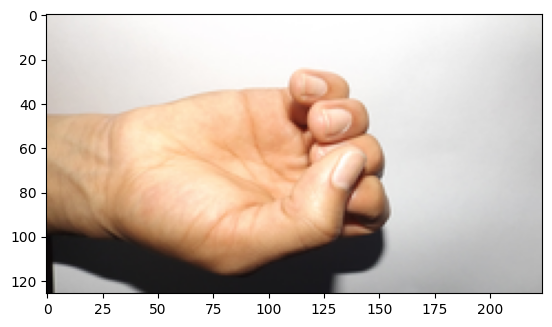

In [11]:
plt.imshow(X_train[100])
plt.show()

## Preprocessing

In [ ]:
clustering_segmentation = ClusteringSegmentation(method='kmeans', n_clusters=3, compactness=30.0, sigma=1.0)
plt.imshow(clustering_segmentation.process(X_train[0]))
plt.show()

In [ ]:
edge_detection = EdgeDetection(method='sobel')
#method: for roberts and canny: image must be 2D
plt.imshow(edge_detection.process(X_train[0]))
plt.show()

In [ ]:
image_restorer = ImageRestorer(method='median')
#'mean_rectangular', 'gaussian', 'adaptive' and 'wiener' generate an error
plt.imshow(image_restorer.process(X_train[0]))
plt.show()

In [ ]:
image_preprocessor = ImagePreprocessor(method = 'CLAHE')
# method = 'log' generates an error
plt.imshow(image_preprocessor.process(X_train[0]))
plt.show()

In [ ]:
region_based_segmentation = RegionBasedSegmentation(method='region_merging')
# method: 'region_splitting' generates an error
plt.imshow(region_based_segmentation.process(X_train[0]))
plt.show()

## Features Extraction

In [28]:
feature_extractor = FeatureExtractor()

# HOG FEATURES
hog_features = []
#10 images with label = 0
for i in range(10):
    hog_features.append(feature_extractor.extract_hog_features(X_train[i]))
# 10 images with label = 3
for i in range(1000, 1010):
    hog_features.append(feature_extractor.extract_hog_features(X_train[i]))
hog_features = np.array(hog_features)
print(f"hog_features shape: {hog_features.shape}")

# LCP FEATURES
lbp_features = []
for i in range(10):
    lbp_features.append(feature_extractor.extract_lbp_features(rgb2gray(X_train[i])))
lbp_features = np.array(lbp_features)
print(f"lbp_features shape: {lbp_features.shape}")

# PCA FEATURES
pca_features = []
for i in range(10):
    pca_features.append(feature_extractor.extract_pca_features(X_train[i]))
pca_features = np.array(pca_features)
print(f"pca_features shape: {pca_features.shape}")


# SIFT FEATURES (error)
# sift_features = []
# for i in range(10):
#     sift_features.append(feature_extractor.extract_sift_features(X_train[i]))
# sift_features = np.array(sift_features)
# print(f"sift_features shape: {sift_features.shape}")

# FOURIER DESCRIPTOR FEATURES (error)
# fourier_descriptor_features = []
# for i in range(10):
#     fourier_descriptor_features.append(feature_extractor.extract_fourier_descriptor_features(X_train[i]))
# fourier_descriptor_features = np.array(fourier_descriptor_features)
# print(f"fourier_descriptor_features shape: {fourier_descriptor_features.shape}")

# SURF FEATURES (error)

surf_features = []
# for i in range(10):
#     surf_features.append(feature_extractor.extract_surf_features(X_train[i]))
# surf_features = np.array(surf_features)
# print(f"surf_features shape: {surf_features.shape}")

d:\Senior II\Pattern Recognition\Project\Project-Pattern-Recognition\feature_extraction\feature_extraction.py:47: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(images, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


hog_features shape: (20, 26244)
lbp_features shape: (10, 224, 224)
pca_features shape: (10, 224, 20)


## Feature Selection

## Model Selection

In [34]:
#true_labels is just for trial here
true_labels = np.concatenate((np.zeros(10), np.ones(10)*3))
model_selection = ModelSelection(hog_features[:15], true_labels[:15], hog_features[15:], true_labels[15:])
knn, y_pred = model_selection.KNN()
print(y_pred)

[0. 3. 3. 3. 3.]


In [74]:
performance_analysis = PerformanceAnalysis('KNN', y_pred, true_labels[15:])
performance_analysis.calculate_performance_metrics()

Model: KNN
Accuracy: 80.0%

Micro Average Precision: 0.8
Micro Average Recall: 0.8
Micro Average F1: 0.8


Macro Average Precision: 0.5
Macro Average Recall: 0.8
Macro Average F1: nan

Weighted Macro Average Precision: nan
Weighted Macro Average Recall: nan
Weighted Macro Average F1: nan


